In [49]:
from functools import partial

import astropy.units as u
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.table import QTable, vstack
from skimage.measure import regionprops, label, regionprops_table
from skimage.color import label2rgb

import sunpy.map

In [50]:
maps = sunpy.map.Map("/Users/priyanujkashyap/Documents/GitHub/KWS24/sunspot_handson/hmi_ic_*fits")
maps = [m.resample((1024, 1024) * u.pix) for m in maps]

In [51]:
maps

 SunPy Map
 ---------
 Observatory:		 SDO
 Instrument:		 HMI FRONT2
 Detector:		 HMI
 Measurement:		 continuum
 Wavelength:		 6173.0
 Observation Date:	 2014-02-13 00:00:26
 Exposure Time:		 Unknown
 Dimension:		 [1024. 1024.] pix
 Coordinate System:	 helioprojective
 Scale:			 [2.017156 2.017156] arcsec / pix
 Reference Pixel:	 [510.14620975 510.4600525 ] pix
 Reference Coord:	 [0. 0.] arcsec                   
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 SunPy Map
 ---------
 Observatory:		 SDO
 Instrument:		 HMI FRONT2
 Detector:		 HMI
 Measurement:		 continuum
 Wavelength:		 6173.0
 Observation Date:	 2019-08-01 00:00:38
 Exposure Time:		 Unknown
 Dimension:		 [1024. 1024.] pix
 Coordinate System:	 helioprojective
 Scale:			 [2.016072 2.016072] 

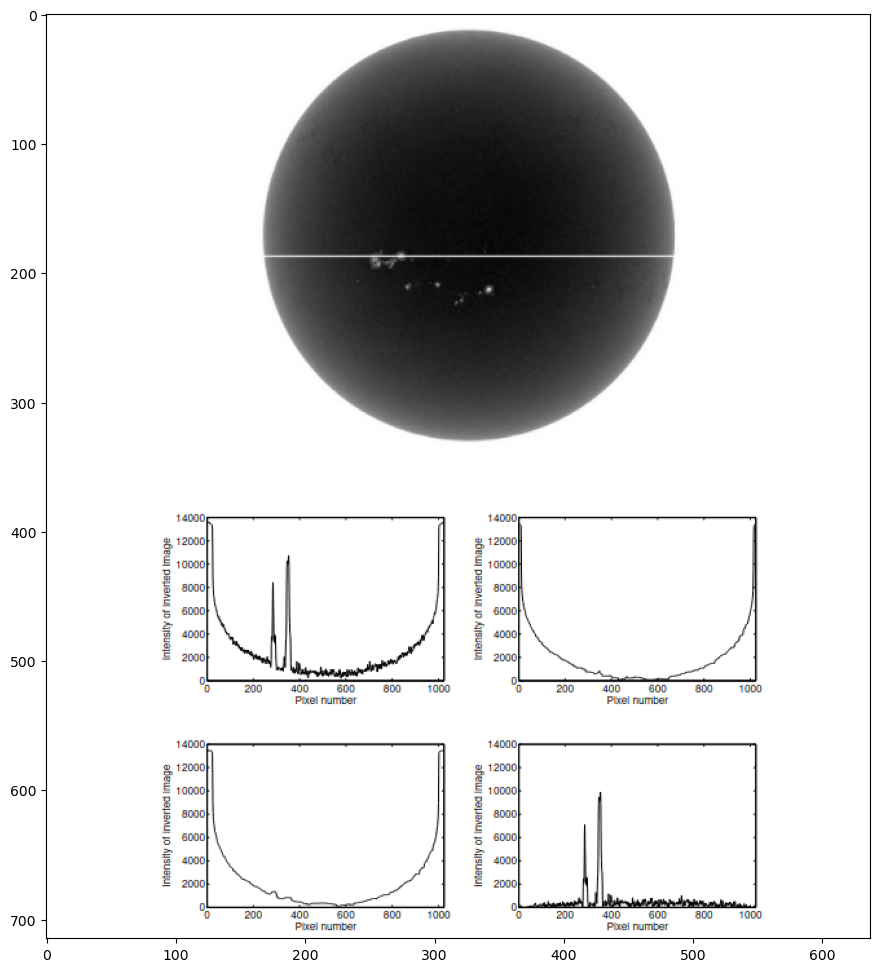

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
spot=plt.imread('/Users/priyanujkashyap/Documents/GitHub/KWS24/sunspot_handson/stara.png')
plt.imshow(spot)

In [53]:
import sys
# Append the directory to your python path using sys
sys.path.append('/Users/priyanujkashyap/Documents/GitHub/KWS24/sunspot_handson/stara.png')
# Import the module
from stara import stara

In [54]:
segs = list(map(partial(stara, limb_filter=5 * u.percent), maps))

In [55]:
def get_regions(segmentation, smap):
    labelled = label(segmentation)
    if labelled.max() == 0:
        return QTable()

    regions = regionprops_table(labelled, smap.data,
                                properties=["label",
                                            "centroid",
                                            "area",
                                            "min_intensity"])
    #print(regions['area'])

    regions['obstime'] = Time([smap.date] * regions['label'].size)

    regions['center_coord'] = smap.pixel_to_world(regions['centroid-0'] * u.pix,
                                                  regions['centroid-1'] * u.pix).heliographic_stonyhurst


    return QTable(regions)


print(list(map(get_regions, segs, maps)))

[<QTable length=21>
label ...                       center_coord                      
      ...                        deg,deg,m                        
int64 ...                         SkyCoord                        
----- ... --------------------------------------------------------
    1 ...  12.909801358583595,20.256450506289028,696000000.0025475
    2 ...  15.643165503698201,41.914636595338386,695999999.9973899
    3 ...    12.034129536943732,26.2305435729957,696000000.0020368
    4 ... -3.2598165219599764,3.5381615911627433,696000000.0010924
    5 ...  -4.0701953468058605,1.165004323799268,695999999.9994531
    6 ...   -5.531247376935141,6.809256509488517,696000000.0032322
    7 ...  -5.430796859251416,12.235936270935603,695999999.9988673
    8 ... -10.807755529592612,-53.81448594577339,695999999.9989086
    9 ... -5.7959427422377985,-1.855562800495278,695999999.9963669
   10 ...   -5.817124231995706,1.6951340829829422,696000000.001175
   11 ...   -5.791361947755831,4.854744499

In [56]:
segs

[array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])]

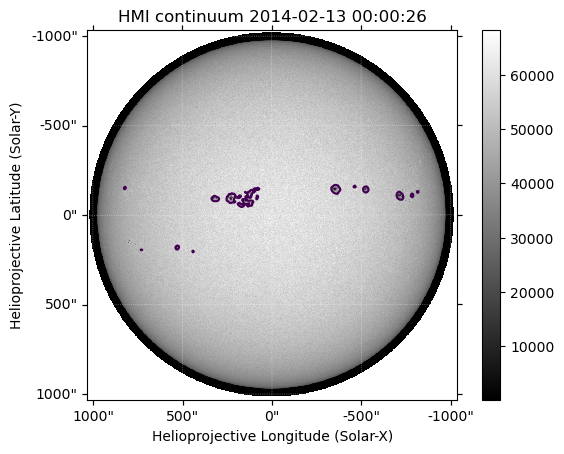

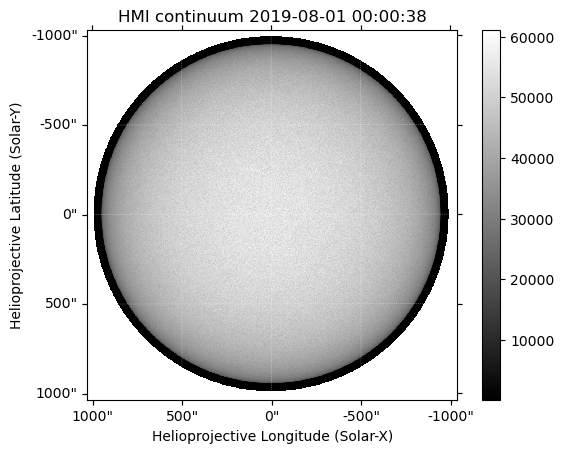

In [57]:
for smap, seg in zip(maps, segs):
  plt.figure()
  ax = plt.subplot(projection=smap)
  smap.plot()
  ax.contour(seg, levels=0)
  plt.colorbar()

plt.show()

In [58]:
seg

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

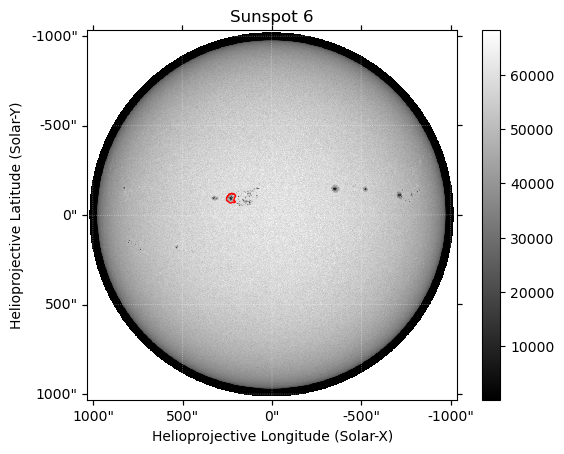

In [59]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Assuming that `maps` and `segs` are lists of map and segmentation objects

for smap, seg in zip(maps, segs):
    # Label connected components in the segmentation
    labelled = label(seg)

    # Extract region properties
    regions = regionprops(labelled)

    # Check if there are any regions
    if regions:
        # Choose one region to display (e.g., the largest)
        largest_region = max(regions, key=lambda x: x.area)

        # Plot a single sunspot region
        plt.figure()
        ax = plt.subplot(projection=smap)
        smap.plot()
        ax.contour(labelled == largest_region.label, levels=0, colors='red', linewidths=1)  # Contour for the specific sunspot
        plt.title(f'Sunspot {largest_region.label}')
        plt.colorbar()

plt.show()


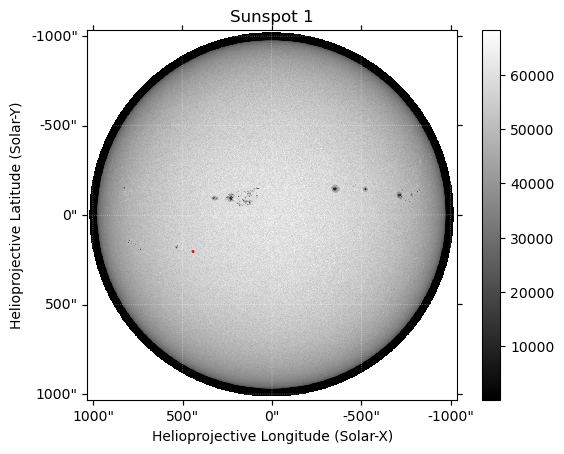

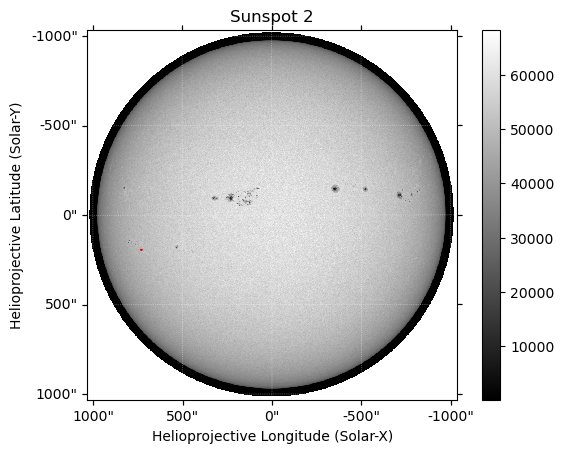

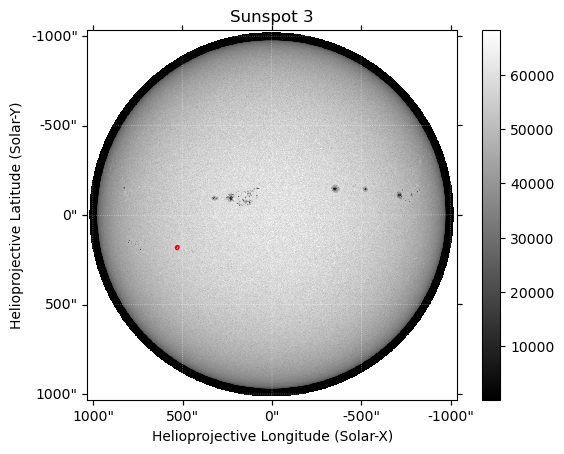

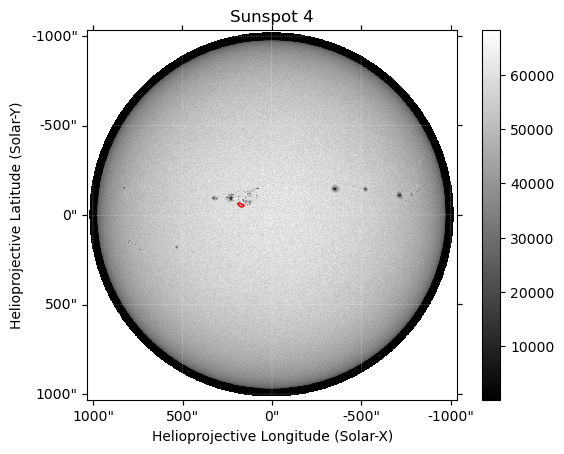

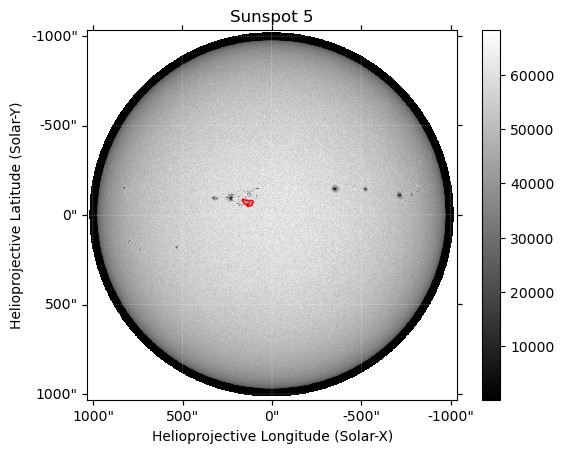

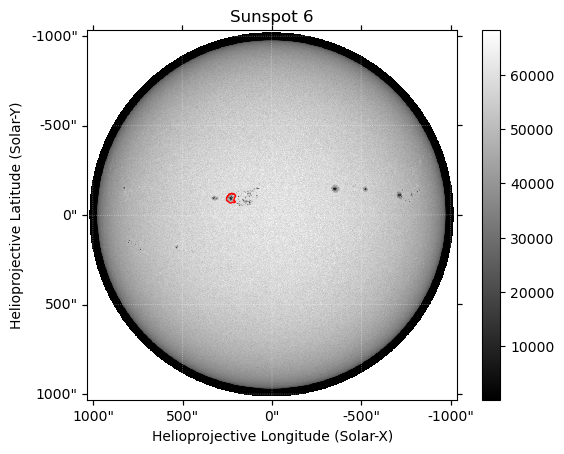

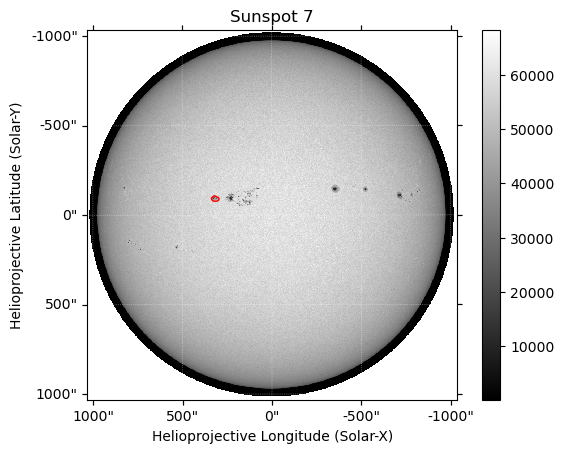

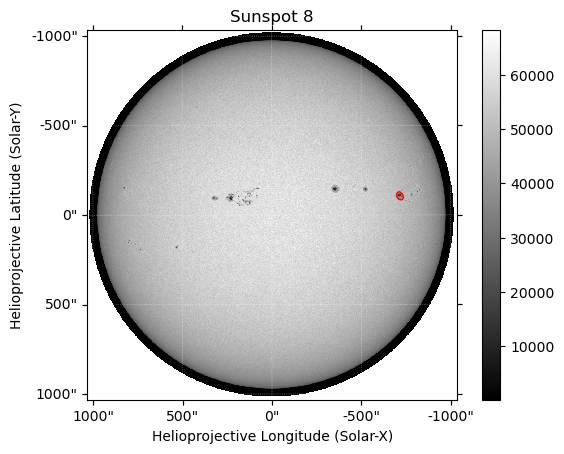

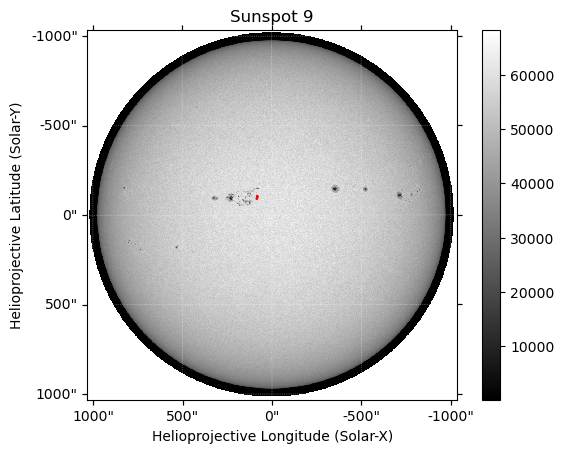

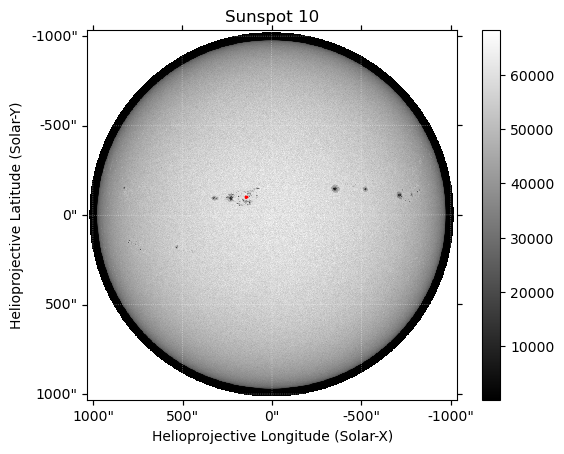

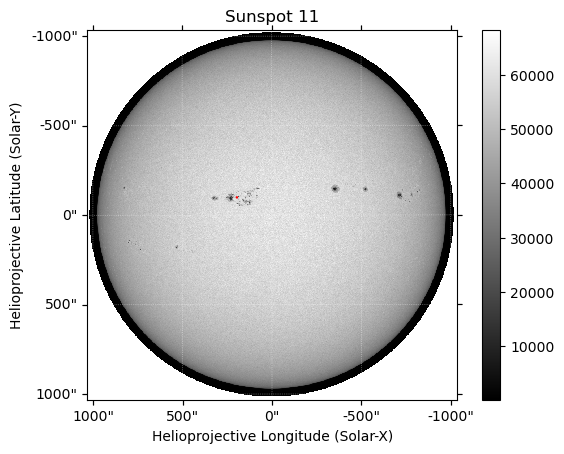

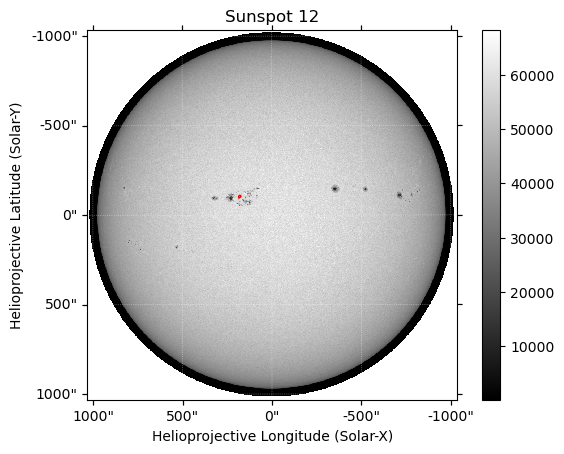

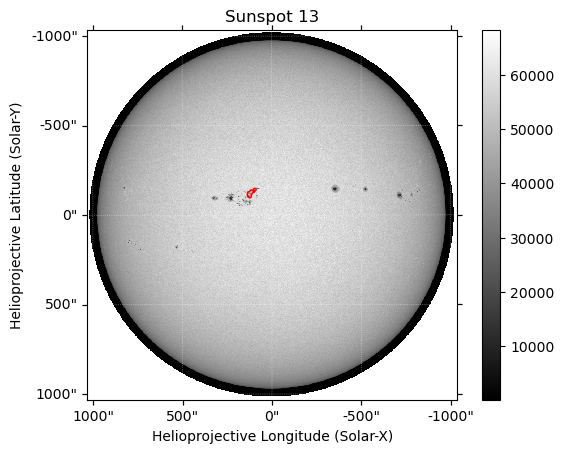

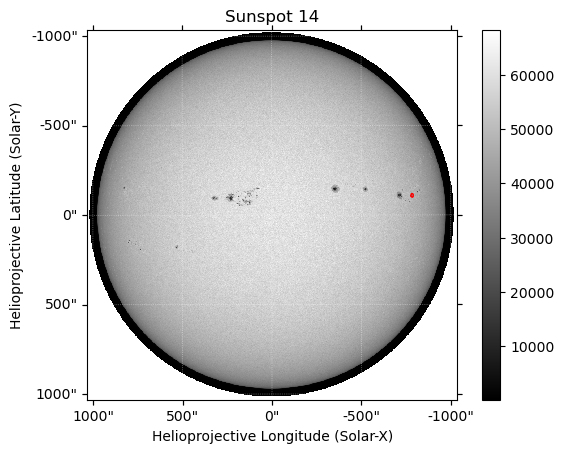

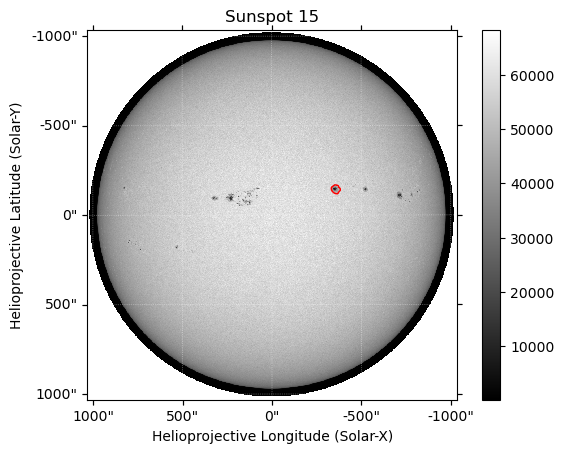

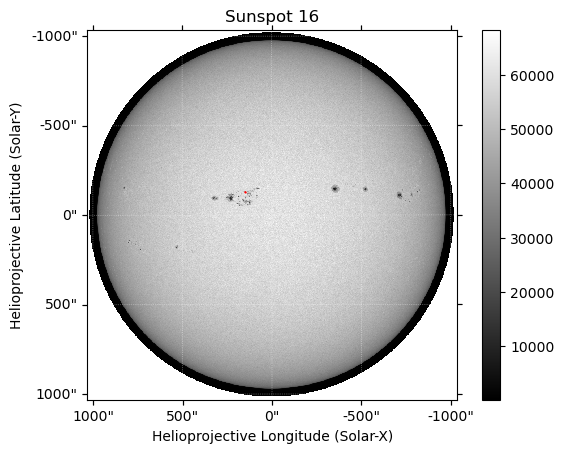

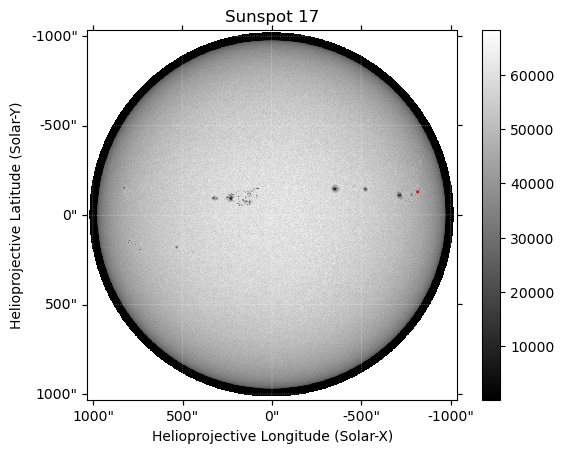

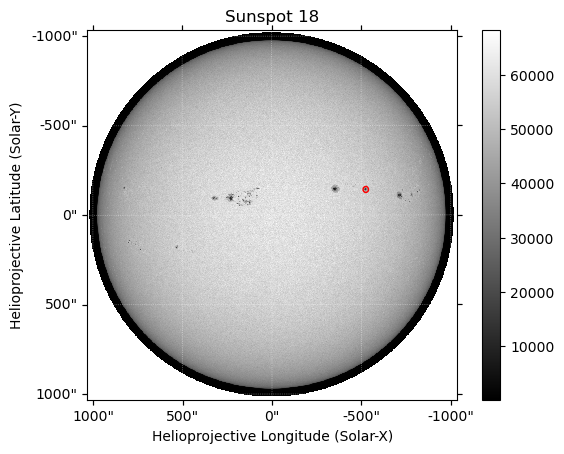

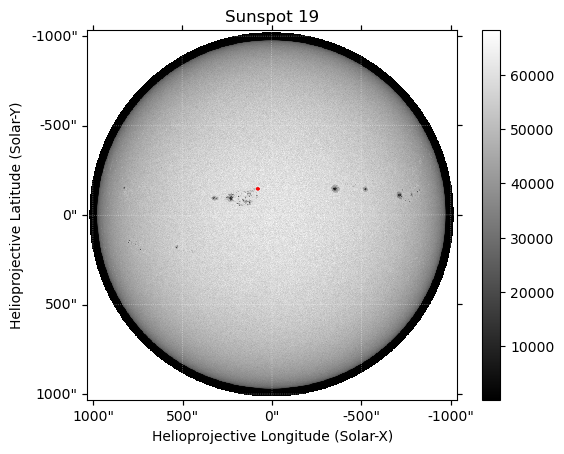

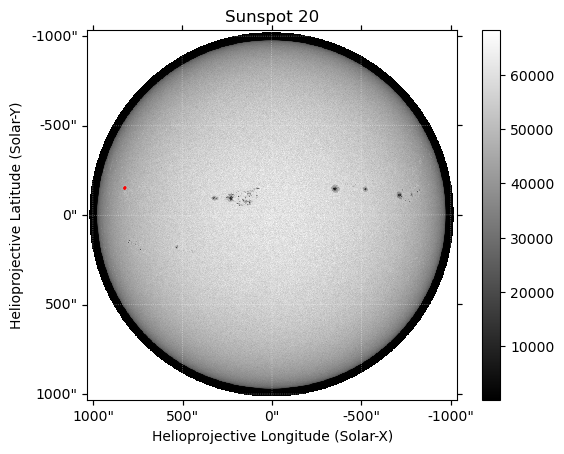

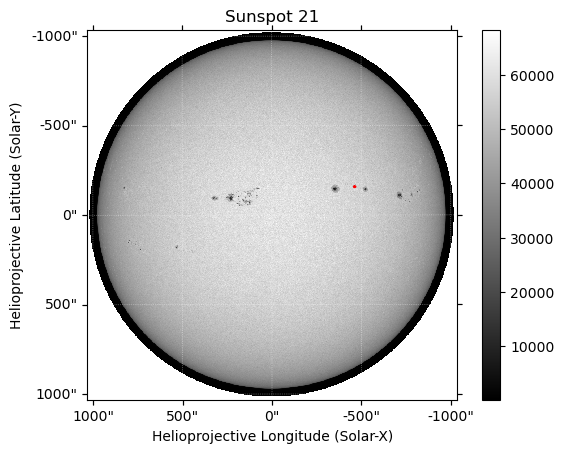

In [60]:
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops

# Assuming that `maps` and `segs` are lists of map and segmentation objects

for smap, seg in zip(maps, segs):
    # Label connected components in the segmentation
    labelled = label(seg)

    # Extract region properties
    regions = regionprops(labelled)

    # Iterate through each region
    for region in regions:
        # Plot a single sunspot region
        plt.figure()
        ax = plt.subplot(projection=smap)
        smap.plot()
        ax.contour(labelled == region.label, levels=0, colors='red', linewidths=1)  # Contour for the specific sunspot
        plt.title(f'Sunspot {region.label}')
        plt.colorbar()
        plt.show()

# Display the plots
plt.show()
